In [1]:
# Loading functions and packages (4D models used for Lorenz with zero 4th dimension) 
from DySMHO_higherDim.model import model_4D
from DySMHO_higherDim.data import Lorenz_zero4D_data_generation
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt

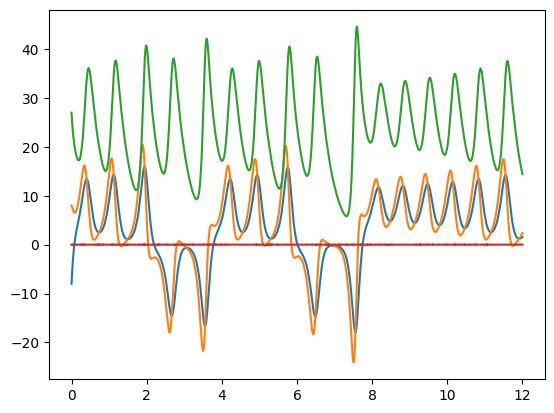



--------------------------- Smoothing data ---------------------------


Prev STD: 0.00126 - New STD: 0.00125 - Percent change: -1.30932
No smoothing applied


Prev STD: 0.00142 - New STD: 0.00141 - Percent change: -0.62143
No smoothing applied


Prev STD: 0.00198 - New STD: 0.00197 - Percent change: -0.41385
No smoothing applied


Prev STD: 0.16914 - New STD: 0.02903 - Percent change: -82.83686
Prev STD: 0.02903 - New STD: 0.01384 - Percent change: -52.33464
Prev STD: 0.01384 - New STD: 0.00903 - Percent change: -34.71741
Prev STD: 0.00903 - New STD: 0.00665 - Percent change: -26.39040
Prev STD: 0.00665 - New STD: 0.00531 - Percent change: -20.20038
Prev STD: 0.00531 - New STD: 0.00439 - Percent change: -17.31533
Prev STD: 0.00439 - New STD: 0.00373 - Percent change: -14.94811
Prev STD: 0.00373 - New STD: 0.00326 - Percent change: -12.60004
Prev STD: 0.00326 - New STD: 0.00288 - Percent change: -11.55786
Prev STD: 0.00288 - New STD: 0.00258 - Percent change: -10.72524
Prev STD: 0.00



Simulation status: Could not use simulation to initialize the model


capi_return is NULL
Call-back cb_fcn_in___user__routines failed.


Solver status: locallyOptimal Error: 6.12611525061247e-05 

Coefficients:
Theta  0 (       1): 3.803942e-03 -- (-2.426500e+00, 2.372813e+00)
Theta  1 (      y0): -9.999909e+00 -- (-1.169873e+01, -8.295266e+00)
Theta  2 (      y1): 9.999727e+00 -- (9.051614e+00, 1.093698e+01)
Theta  3 (      y2): -4.220195e-05 -- (-2.641897e-01, 2.696097e-01)
Theta  4 (      y3): -1.500099e+01 -- (-2.282225e+03, 2.251844e+03)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
T

capi_return is NULL
Call-back cb_fcn_in___user__routines failed.


Solver status: locallyOptimal Error: 6.13153088682793e-05 

Coefficients:
Theta  0 (       1): 1.862207e-02 -- (-2.426500e+00, 2.372813e+00)
Theta  1 (      y0): -9.996545e+00 -- (-1.169873e+01, -8.295266e+00)
Theta  2 (      y1): 9.997863e+00 -- (9.051614e+00, 1.093698e+01)
Theta  3 (      y2): -1.109762e-03 -- (-2.641897e-01, 2.696097e-01)
Theta  4 (      y3): -1.500113e+01 -- (-2.282225e+03, 2.251844e+03)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
T

capi_return is NULL
Call-back cb_fcn_in___user__routines failed.


Solver status: feasible Error: 6.16231706971995e-05 

Coefficients:
Theta  0 (       1): 3.309937e-02 -- (-2.426500e+00, 2.372813e+00)
Theta  1 (      y0): -9.993487e+00 -- (-1.169873e+01, -8.295266e+00)
Theta  2 (      y1): 9.996455e+00 -- (9.051614e+00, 1.093698e+01)
Theta  3 (      y2): -2.291690e-03 -- (-2.641897e-01, 2.696097e-01)
Theta  4 (      y3): -1.504354e+01 -- (-2.282225e+03, 2.251844e+03)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
Theta 3

capi_return is NULL
Call-back cb_fcn_in___user__routines failed.


Solver status: infeasible Error: 6.825206681282294e-05 

Coefficients:
Theta  0 (       1): 3.324931e-02 -- (-2.426500e+00, 2.372813e+00)
Theta  1 (      y0): -1.001065e+01 -- (-1.169873e+01, -8.295266e+00)
Theta  2 (      y1): 1.000715e+01 -- (9.051614e+00, 1.093698e+01)
Theta  3 (      y2): -6.308349e-04 -- (-2.641897e-01, 2.696097e-01)
Theta  4 (      y3): -1.504354e+01 -- (-2.282225e+03, 2.251844e+03)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
Thet

capi_return is NULL
Call-back cb_fcn_in___user__routines failed.


Solver status: infeasible Error: 9.756535198481047e-05 

Coefficients:
Theta  0 (       1): 3.324522e-02 -- (-2.426500e+00, 2.372813e+00)
Theta  1 (      y0): -1.000861e+01 -- (-1.169873e+01, -8.295266e+00)
Theta  2 (      y1): 1.001221e+01 -- (9.051614e+00, 1.093698e+01)
Theta  3 (      y2): -1.865625e-03 -- (-2.641897e-01, 2.696097e-01)
Theta  4 (      y3): -1.481499e+01 -- (-2.282225e+03, 2.251844e+03)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
Thet

capi_return is NULL
Call-back cb_fcn_in___user__routines failed.


Solver status: infeasible Error: 0.00010709746235434912 

Coefficients:
Theta  0 (       1): 3.324541e-02 -- (-2.426500e+00, 2.372813e+00)
Theta  1 (      y0): -9.998473e+00 -- (-1.169873e+01, -8.295266e+00)
Theta  2 (      y1): 1.001353e+01 -- (9.051614e+00, 1.093698e+01)
Theta  3 (      y2): -1.518013e-03 -- (-2.641897e-01, 2.696097e-01)
Theta  4 (      y3): -1.481499e+01 -- (-2.282225e+03, 2.251844e+03)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
The

capi_return is NULL
Call-back cb_fcn_in___user__routines failed.


Solver status: infeasible Error: 0.00011048126141259102 

Coefficients:
Theta  0 (       1): 3.313912e-02 -- (-2.426500e+00, 2.372813e+00)
Theta  1 (      y0): -1.000891e+01 -- (-1.169873e+01, -8.295266e+00)
Theta  2 (      y1): 1.000213e+01 -- (9.051614e+00, 1.093698e+01)
Theta  3 (      y2): -1.850161e-03 -- (-2.641897e-01, 2.696097e-01)
Theta  4 (      y3): -1.481524e+01 -- (-2.282225e+03, 2.251844e+03)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
The

capi_return is NULL
Call-back cb_fcn_in___user__routines failed.


Solver status: infeasible Error: 0.00011168493123857605 

Coefficients:
Theta  0 (       1): 3.317761e-02 -- (-2.426500e+00, 2.372813e+00)
Theta  1 (      y0): -1.000750e+01 -- (-1.169873e+01, -8.295266e+00)
Theta  2 (      y1): 1.000186e+01 -- (9.051614e+00, 1.093698e+01)
Theta  3 (      y2): -2.417325e-05 -- (-2.641897e-01, 2.696097e-01)
Theta  4 (      y3): -1.481525e+01 -- (-2.282225e+03, 2.251844e+03)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
The

capi_return is NULL
Call-back cb_fcn_in___user__routines failed.


Solver status: locallyOptimal Error: 0.0 

Coefficients:
Theta  0 (       1): 3.407131e-02 -- (-2.426500e+00, 2.372813e+00)
Theta  1 (      y0): -1.001150e+01 -- (-1.169873e+01, -8.295266e+00)
Theta  2 (      y1): 1.001119e+01 -- (9.051614e+00, 1.093698e+01)
Theta  3 (      y2): -9.566058e-04 -- (-2.641897e-01, 2.696097e-01)
Theta  4 (      y3): -1.481520e+01 -- (-2.282225e+03, 2.251844e+03)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
Theta 30 (    1/y0

capi_return is NULL
Call-back cb_fcn_in___user__routines failed.


Solver status: infeasible Error: 9.90153731875212e-05 

Coefficients:
Theta  0 (       1): 3.407008e-02 -- (-2.426500e+00, 2.372813e+00)
Theta  1 (      y0): -1.000290e+01 -- (-1.169873e+01, -8.295266e+00)
Theta  2 (      y1): 9.997711e+00 -- (9.051614e+00, 1.093698e+01)
Theta  3 (      y2): -8.509903e-04 -- (-2.641897e-01, 2.696097e-01)
Theta  4 (      y3): -1.481520e+01 -- (-2.282225e+03, 2.251844e+03)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
Theta

capi_return is NULL
Call-back cb_fcn_in___user__routines failed.


Solver status: infeasible Error: 0.00010539589897186035 

Coefficients:
Theta  0 (       1): 3.408404e-02 -- (-2.426500e+00, 2.372813e+00)
Theta  1 (      y0): -1.000347e+01 -- (-1.169873e+01, -8.295266e+00)
Theta  2 (      y1): 9.993555e+00 -- (9.051614e+00, 1.093698e+01)
Theta  3 (      y2): -1.007756e-03 -- (-2.641897e-01, 2.696097e-01)
Theta  4 (      y3): -1.481520e+01 -- (-2.282225e+03, 2.251844e+03)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
The

Solver status: locallyOptimal Error: 6.734467136668827e-05 

Coefficients:
Theta  0 (       1): 3.326674e-03 -- (-5.575869e-01, 5.645290e-01)
Theta  1 (      y0): -1.000023e+01 -- (-1.005113e+01, -9.948454e+00)
Theta  2 (      y1): 1.000045e+01 -- (9.955701e+00, 1.004400e+01)
Theta  3 (      y2): -1.578037e-04 -- (-2.286981e-02, 2.254615e-02)
Theta  4 (      y3): 1.505062e+00 -- (-2.418882e+02, 2.448983e+02)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
T

Solver status: locallyOptimal Error: 6.775740821103741e-05 

Coefficients:
Theta  0 (       1): 5.546844e-03 -- (-5.575869e-01, 5.645290e-01)
Theta  1 (      y0): -1.000064e+01 -- (-1.005113e+01, -9.948454e+00)
Theta  2 (      y1): 1.000077e+01 -- (9.955701e+00, 1.004400e+01)
Theta  3 (      y2): -2.283658e-04 -- (-2.286981e-02, 2.254615e-02)
Theta  4 (      y3): 1.505062e+00 -- (-2.418882e+02, 2.448983e+02)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
T

Solver status: locallyOptimal Error: 6.668765967444888e-05 

Coefficients:
Theta  0 (       1): 7.195840e-04 -- (-5.575869e-01, 5.645290e-01)
Theta  1 (      y0): -1.000154e+01 -- (-1.005113e+01, -9.948454e+00)
Theta  2 (      y1): 1.000128e+01 -- (9.955701e+00, 1.004400e+01)
Theta  3 (      y2): 5.411519e-05 -- (-2.286981e-02, 2.254615e-02)
Theta  4 (      y3): 1.503733e+00 -- (-2.418882e+02, 2.448983e+02)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
Th

Solver status: locallyOptimal Error: 6.635185655376309e-05 

Coefficients:
Theta  0 (       1): -3.347890e-04 -- (-5.575869e-01, 5.645290e-01)
Theta  1 (      y0): -1.000241e+01 -- (-1.005113e+01, -9.948454e+00)
Theta  2 (      y1): 1.000148e+01 -- (9.955701e+00, 1.004400e+01)
Theta  3 (      y2): -1.241443e-04 -- (-2.286981e-02, 2.254615e-02)
Theta  4 (      y3): 1.503732e+00 -- (-2.418882e+02, 2.448983e+02)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0


Solver status: locallyOptimal Error: 6.576951271453116e-05 

Coefficients:
Theta  0 (       1): -3.402403e-03 -- (-2.037157e-01, 2.032054e-01)
Theta  1 (      y0): -1.000217e+01 -- (-1.005012e+01, -9.949620e+00)
Theta  2 (      y1): 1.000123e+01 -- (9.956101e+00, 1.004368e+01)
Theta  3 (      y2): 0
Theta  4 (      y3): 1.370775e+00 -- (-2.412819e+02, 2.440234e+02)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
Theta 30 (    1/y0): 0
Theta 31 ( sin(y0)): 0

Solver status: locallyOptimal Error: 6.544256008149876e-05 

Coefficients:
Theta  0 (       1): -5.696469e-04 -- (-2.037157e-01, 2.032054e-01)
Theta  1 (      y0): -1.000170e+01 -- (-1.005012e+01, -9.949620e+00)
Theta  2 (      y1): 1.000142e+01 -- (9.956101e+00, 1.004368e+01)
Theta  3 (      y2): 0
Theta  4 (      y3): 1.333510e+00 -- (-2.412819e+02, 2.440234e+02)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
Theta 30 (    1/y0): 0
Theta 31 ( sin(y0)): 0

Solver status: locallyOptimal Error: 6.46716923005187e-05 

Coefficients:
Theta  0 (       1): -4.662823e-05 -- (-2.037157e-01, 2.032054e-01)
Theta  1 (      y0): -1.000122e+01 -- (-1.005012e+01, -9.949620e+00)
Theta  2 (      y1): 1.000089e+01 -- (9.956101e+00, 1.004368e+01)
Theta  3 (      y2): 0
Theta  4 (      y3): 1.333272e+00 -- (-2.412819e+02, 2.440234e+02)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
Theta 30 (    1/y0): 0
Theta 31 ( sin(y0)): 0


Solver status: locallyOptimal Error: 6.558228103906734e-05 

Coefficients:
Theta  0 (       1): 1.193719e-03 -- (-2.037157e-01, 2.032054e-01)
Theta  1 (      y0): -1.000144e+01 -- (-1.005012e+01, -9.949620e+00)
Theta  2 (      y1): 1.000113e+01 -- (9.956101e+00, 1.004368e+01)
Theta  3 (      y2): 0
Theta  4 (      y3): 1.333249e+00 -- (-2.412819e+02, 2.440234e+02)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
Theta 30 (    1/y0): 0
Theta 31 ( sin(y0)): 0


Solver status: locallyOptimal Error: 6.44595704355212e-05 

Coefficients:
Theta  0 (       1): 0
Theta  1 (      y0): -1.000140e+01 -- (-1.004916e+01, -9.950606e+00)
Theta  2 (      y1): 1.000123e+01 -- (9.956119e+00, 1.004366e+01)
Theta  3 (      y2): 0
Theta  4 (      y3): 1.381004e+00 -- (-2.411252e+02, 2.438872e+02)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
Theta 30 (    1/y0): 0
Theta 31 ( sin(y0)): 0
Theta 32 ( cos(y0)): 0
Theta 33 (       1): 0

Solver status: locallyOptimal Error: 6.284794068783042e-05 

Coefficients:
Theta  0 (       1): 0
Theta  1 (      y0): -1.000074e+01 -- (-1.004916e+01, -9.950606e+00)
Theta  2 (      y1): 1.000056e+01 -- (9.956119e+00, 1.004366e+01)
Theta  3 (      y2): 0
Theta  4 (      y3): 1.381004e+00 -- (-2.411252e+02, 2.438872e+02)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
Theta 30 (    1/y0): 0
Theta 31 ( sin(y0)): 0
Theta 32 ( cos(y0)): 0
Theta 33 (       1): 

Solver status: locallyOptimal Error: 6.354006886462593e-05 

Coefficients:
Theta  0 (       1): 0
Theta  1 (      y0): -9.998282e+00 -- (-1.004916e+01, -9.950606e+00)
Theta  2 (      y1): 9.998805e+00 -- (9.956119e+00, 1.004366e+01)
Theta  3 (      y2): 0
Theta  4 (      y3): -1.381014e+00 -- (-2.411252e+02, 2.438872e+02)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
Theta 30 (    1/y0): 0
Theta 31 ( sin(y0)): 0
Theta 32 ( cos(y0)): 0
Theta 33 (       1):

Solver status: locallyOptimal Error: 6.523855255087281e-05 

Coefficients:
Theta  0 (       1): 0
Theta  1 (      y0): -9.999003e+00 -- (-1.004916e+01, -9.950606e+00)
Theta  2 (      y1): 9.999338e+00 -- (9.956119e+00, 1.004366e+01)
Theta  3 (      y2): 0
Theta  4 (      y3): -1.381021e+00 -- (-2.411252e+02, 2.438872e+02)
Theta  5 (   y0*y1): 0
Theta  6 (   y0*y2): 0
Theta  7 (   y0*y3): 0
Theta  8 (   y1*y2): 0
Theta  9 (   y1*y3): 0
Theta 10 (   y2*y3): 0
Theta 11 (    y0^2): 0
Theta 12 (    y1^2): 0
Theta 13 (    y2^2): 0
Theta 14 (    y3^2): 0
Theta 15 ((y0^2)*y1): 0
Theta 16 (y0*(y1^2)): 0
Theta 17 ((y0^2)*y2): 0
Theta 18 (y0*(y2^2)): 0
Theta 19 ((y0^2)*y3): 0
Theta 20 (y0*(y3^2)): 0
Theta 21 ((y1^2)*y2): 0
Theta 22 (y1*(y2^2)): 0
Theta 23 ((y1^2)*y3): 0
Theta 24 (y1*(y3^2)): 0
Theta 25 ((y2^2)*y3): 0
Theta 26 (y2*(y3^2)): 0
Theta 27 (    y0^3): 0
Theta 28 (    y0^4): 0
Theta 29 ( exp(y0)): 0
Theta 30 (    1/y0): 0
Theta 31 ( sin(y0)): 0
Theta 32 ( cos(y0)): 0
Theta 33 (       1):

ValueError: zero-size array to reduction operation maximum which has no identity

In [2]:
# Define initial conditions for the 3 states 
y_init = [-8, 8, 27, 0]

# Horizon length for optimization problem (arbitrary time units) 
horizon_length = 2 

# Number of sampling time periods taken per MHE step
time_steps = 10  


# Basis functions for dynamics of state 1 
basis_functions_y0 = [lambda y0, y1, y2, y3: 1, 
                      lambda y0, y1, y2, y3: y0,
                      lambda y0, y1, y2, y3: y1,
                      lambda y0, y1, y2, y3: y2,  
                      lambda y0, y1, y2, y3: y3,
                      lambda y0, y1, y2, y3: y0*y1,
                      lambda y0, y1, y2, y3: y0*y2,
                      lambda y0, y1, y2, y3: y0*y3,
                      lambda y0, y1, y2, y3: y1*y2,
                      lambda y0, y1, y2, y3: y1*y3,
                      lambda y0, y1, y2, y3: y2*y3,
                      lambda y0, y1, y2, y3: y0**2,
                      lambda y0, y1, y2, y3: y1**2,
                      lambda y0, y1, y2, y3: y2**2,
                      lambda y0, y1, y2, y3: y3**2,
                      lambda y0, y1, y2, y3: (y0**2)*y1,
                      lambda y0, y1, y2, y3: y0*(y1**2),
                      lambda y0, y1, y2, y3: (y0**2)*y2,
                      lambda y0, y1, y2, y3: y0*(y2**2),
                      lambda y0, y1, y2, y3: (y0**2)*y3,
                      lambda y0, y1, y2, y3: y0*(y3**2),
                      lambda y0, y1, y2, y3: (y1**2)*y2,
                      lambda y0, y1, y2, y3: y1*(y2**2),
                      lambda y0, y1, y2, y3: (y1**2)*y3,
                      lambda y0, y1, y2, y3: y1*(y3**2),
                      lambda y0, y1, y2, y3: (y2**2)*y3,
                      lambda y0, y1, y2, y3: y2*(y3**2),
                      lambda y0, y1, y2, y3: y0**3,
                      lambda y0, y1, y2, y3: y0**4,
                      lambda y0, y1, y2, y3: np.exp(y0), 
                      lambda y0, y1, y2, y3: 1/y0, 
                      lambda y0, y1, y2, y3: np.sin(y0),
                      lambda y0, y1, y2, y3: np.cos(y0)]
# Basis functions for dynamics of state 2
basis_functions_y1 = [lambda y0, y1, y2, y3: 1, 
                      lambda y0, y1, y2, y3: y0,
                      lambda y0, y1, y2, y3: y1,
                      lambda y0, y1, y2, y3: y2,  
                      lambda y0, y1, y2, y3: y3,
                      lambda y0, y1, y2, y3: y0*y1,
                      lambda y0, y1, y2, y3: y0*y2,
                      lambda y0, y1, y2, y3: y0*y3,
                      lambda y0, y1, y2, y3: y1*y2,
                      lambda y0, y1, y2, y3: y1*y3,
                      lambda y0, y1, y2, y3: y2*y3,
                      lambda y0, y1, y2, y3: y0**2,
                      lambda y0, y1, y2, y3: y1**2,
                      lambda y0, y1, y2, y3: y2**2,
                      lambda y0, y1, y2, y3: y3**2,
                      lambda y0, y1, y2, y3: (y0**2)*y1,
                      lambda y0, y1, y2, y3: y0*(y1**2),
                      lambda y0, y1, y2, y3: (y0**2)*y2,
                      lambda y0, y1, y2, y3: y0*(y2**2),
                      lambda y0, y1, y2, y3: (y0**2)*y3,
                      lambda y0, y1, y2, y3: y0*(y3**2),
                      lambda y0, y1, y2, y3: (y1**2)*y2,
                      lambda y0, y1, y2, y3: y1*(y2**2),
                      lambda y0, y1, y2, y3: (y1**2)*y3,
                      lambda y0, y1, y2, y3: y1*(y3**2),
                      lambda y0, y1, y2, y3: (y2**2)*y3,
                      lambda y0, y1, y2, y3: y2*(y3**2),
                      lambda y0, y1, y2, y3: y1**3,
                      lambda y0, y1, y2, y3: y1**4,
                      lambda y0, y1, y2, y3: np.exp(y1), 
                      lambda y0, y1, y2, y3: 1/y1, 
                      lambda y0, y1, y2, y3: np.sin(y1),
                      lambda y0, y1, y2, y3: np.cos(y1)]
# Basis functions for dynamics of state 3
basis_functions_y2 = [lambda y0, y1, y2, y3: 1, 
                      lambda y0, y1, y2, y3: y0,
                      lambda y0, y1, y2, y3: y1,
                      lambda y0, y1, y2, y3: y2,  
                      lambda y0, y1, y2, y3: y3,
                      lambda y0, y1, y2, y3: y0*y1,
                      lambda y0, y1, y2, y3: y0*y2,
                      lambda y0, y1, y2, y3: y0*y3,
                      lambda y0, y1, y2, y3: y1*y2,
                      lambda y0, y1, y2, y3: y1*y3,
                      lambda y0, y1, y2, y3: y2*y3,
                      lambda y0, y1, y2, y3: y0**2,
                      lambda y0, y1, y2, y3: y1**2,
                      lambda y0, y1, y2, y3: y2**2,
                      lambda y0, y1, y2, y3: y3**2,
                      lambda y0, y1, y2, y3: (y0**2)*y1,
                      lambda y0, y1, y2, y3: y0*(y1**2),
                      lambda y0, y1, y2, y3: (y0**2)*y2,
                      lambda y0, y1, y2, y3: y0*(y2**2),
                      lambda y0, y1, y2, y3: (y0**2)*y3,
                      lambda y0, y1, y2, y3: y0*(y3**2),
                      lambda y0, y1, y2, y3: (y1**2)*y2,
                      lambda y0, y1, y2, y3: y1*(y2**2),
                      lambda y0, y1, y2, y3: (y1**2)*y3,
                      lambda y0, y1, y2, y3: y1*(y3**2),
                      lambda y0, y1, y2, y3: (y2**2)*y3,
                      lambda y0, y1, y2, y3: y2*(y3**2),
                      lambda y0, y1, y2, y3: y2**3,
                      lambda y0, y1, y2, y3: y2**4,
                      lambda y0, y1, y2, y3: np.exp(y2), 
                      lambda y0, y1, y2, y3: 1/y2, 
                      lambda y0, y1, y2, y3: np.sin(y2),
                      lambda y0, y1, y2, y3: np.cos(y2)]
# Basis functions for dynamics of state 4
basis_functions_y3 = [lambda y0, y1, y2, y3: 1,
                        lambda y0, y1, y2, y3: y0,
                        lambda y0, y1, y2, y3: y1,
                        lambda y0, y1, y2, y3: y2,
                        lambda y0, y1, y2, y3: y3,
                        lambda y0, y1, y2, y3: y0*y1,
                        lambda y0, y1, y2, y3: y0*y2,
                        lambda y0, y1, y2, y3: y0*y3,
                        lambda y0, y1, y2, y3: y1*y2,
                        lambda y0, y1, y2, y3: y1*y3,
                        lambda y0, y1, y2, y3: y2*y3,
                        lambda y0, y1, y2, y3: y0**2,
                        lambda y0, y1, y2, y3: y1**2,
                        lambda y0, y1, y2, y3: y2**2,
                        lambda y0, y1, y2, y3: y3**2,
                        lambda y0, y1, y2, y3: (y0**2)*y1,
                        lambda y0, y1, y2, y3: y0*(y1**2),
                        lambda y0, y1, y2, y3: (y0**2)*y2,
                        lambda y0, y1, y2, y3: y0*(y2**2),
                        lambda y0, y1, y2, y3: (y0**2)*y3,
                        lambda y0, y1, y2, y3: y0*(y3**2),
                        lambda y0, y1, y2, y3: (y1**2)*y2,
                        lambda y0, y1, y2, y3: y1*(y2**2),
                        lambda y0, y1, y2, y3: (y1**2)*y3,
                        lambda y0, y1, y2, y3: y1*(y3**2),
                        lambda y0, y1, y2, y3: (y2**2)*y3,
                        lambda y0, y1, y2, y3: y2*(y3**2),
                        lambda y0, y1, y2, y3: y3**3,
                        lambda y0, y1, y2, y3: y3**4,
                        lambda y0, y1, y2, y3: np.exp(y3),
                        lambda y0, y1, y2, y3: 1/y3,
                        lambda y0, y1, y2, y3: np.sin(y3),
                        lambda y0, y1, y2, y3: np.cos(y3)]


# Basis function names
basis_functions_names_y0 = ['1',
                            'y0', 'y1', 'y2', 'y3',
                            'y0*y1', 'y0*y2', 'y0*y3', 'y1*y2', 'y1*y3', 'y2*y3',
                            'y0^2', 'y1^2', 'y2^2', 'y3^2',
                            '(y0^2)*y1', 'y0*(y1^2)', '(y0^2)*y2', 'y0*(y2^2)', '(y0^2)*y3', 'y0*(y3^2)',
                            '(y1^2)*y2', 'y1*(y2^2)', '(y1^2)*y3', 'y1*(y3^2)', '(y2^2)*y3', 'y2*(y3^2)',
                            ' y0^3',  'y0^4', 'exp(y0)', '1/y0', 'sin(y0)', 'cos(y0)']
basis_functions_names_y1 = ['1',
                            'y0', 'y1', 'y2', 'y3',
                            'y0*y1', 'y0*y2', 'y0*y3', 'y1*y2', 'y1*y3', 'y2*y3',
                            'y0^2', 'y1^2', 'y2^2', 'y3^2',
                            '(y0^2)*y1', 'y0*(y1^2)', '(y0^2)*y2', 'y0*(y2^2)', '(y0^2)*y3', 'y0*(y3^2)',
                            '(y1^2)*y2', 'y1*(y2^2)', '(y1^2)*y3', 'y1*(y3^2)', '(y2^2)*y3', 'y2*(y3^2)',
                            ' y1^3',  'y1^4', 'exp(y1)', '1/y1', 'sin(y1)', 'cos(y1)']
basis_functions_names_y2 = ['1',
                            'y0', 'y1', 'y2', 'y3',
                            'y0*y1', 'y0*y2', 'y0*y3', 'y1*y2', 'y1*y3', 'y2*y3',
                            'y0^2', 'y1^2', 'y2^2', 'y3^2',
                            '(y0^2)*y1', 'y0*(y1^2)', '(y0^2)*y2', 'y0*(y2^2)', '(y0^2)*y3', 'y0*(y3^2)',
                            '(y1^2)*y2', 'y1*(y2^2)', '(y1^2)*y3', 'y1*(y3^2)', '(y2^2)*y3', 'y2*(y3^2)',
                            ' y2^3',  'y2^4', 'exp(y2)', '1/y2', 'sin(y2)', 'cos(y2)']
basis_functions_names_y3 = ['1',
                            'y0', 'y1', 'y2', 'y3',
                            'y0*y1', 'y0*y2', 'y0*y3', 'y1*y2', 'y1*y3', 'y2*y3',
                            'y0^2', 'y1^2', 'y2^2', 'y3^2',
                            '(y0^2)*y1', 'y0*(y1^2)', '(y0^2)*y2', 'y0*(y2^2)', '(y0^2)*y3', 'y0*(y3^2)',
                            '(y1^2)*y2', 'y1*(y2^2)', '(y1^2)*y3', 'y1*(y3^2)', '(y2^2)*y3', 'y2*(y3^2)',
                            ' y3^3',  'y3^4', 'exp(y3)', '1/y3', 'sin(y3)', 'cos(y3)']
basis_y0 = {'functions': basis_functions_y0, 'names': basis_functions_names_y0} 
basis_y1 = {'functions': basis_functions_y1, 'names': basis_functions_names_y1}
basis_y2 = {'functions': basis_functions_y2, 'names': basis_functions_names_y2}
basis_y3 = {'functions': basis_functions_y3, 'names': basis_functions_names_y3}


# Data generation (time grid)
xs = np.linspace(0, horizon_length + time_steps, 1000 * (horizon_length + time_steps) + 1)
# Data generation (simulating true dynamics on the time grid with addition of white noise )
t, y = Lorenz_zero4D_data_generation.data_gen(xs, y_init, [0, 0.005, 0, 0.005, 0, 0.005, 0, 0.005], False)
t_nf, y_nf = Lorenz_zero4D_data_generation.data_gen(xs, y_init, [0, 0, 0, 0, 0, 0, 0, 0], False)

# Visualizing simulated data
plt.plot(t,y)
plt.show()


# Creating MHL class (note 3D model used) 
L_example = model_4D.fourD_MHL(y,t, [basis_y0,basis_y1,basis_y2,basis_y3])
# Applying SV smoothing 
L_example.smooth()
# Pre-processing 1: generates features and tests for Granger Causality 
L_example.pre_processing_1()
# Pre-processing 2: uses OLS for initialization and for bounding parameters
L_example.pre_processing_2(significance = 0.7, plot = False)
# Calling for main discovery task
L_example.discover(horizon_length,
                   time_steps,
                   data_step = 100,
                   optim_options = {'nfe':80, 'ncp':5},
                   thresholding_frequency = 10,
                   thresholding_tolerance = 1)
# Validation of discovered equations
L_example.validate(xs, y_nf, plot = True)
    